In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from IPython.display import display
import seaborn as sns

In [2]:
from glob import glob

req_cols = ['Date', 'HomeTeam', 'AwayTeam', 
            'HTHG', 'HTAG', 'HTR', 'FTHG', 'FTAG', 'FTR',
            'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 
            'HF', 'AF', 'HY', 'AY', 'HR', 'AR']

#Function to concat all the csv files into one file
def concat(outfile = 'concat-seasons.csv'): #outfile = "name of the output file"
    filenames = glob('data/seasons/season*.csv') #many filenames have similar pattern 
    dataframes = []
    for files in filenames:
        dataframes.append(pd.read_csv(files, usecols=req_cols))
    concatDF = pd.concat(dataframes, axis=0) #axis=0 to concat vertically 
    concatDF.to_csv('data/'+ outfile, index = None) #index=None for no indexing
    
concat() #concat function call
    
data = pd.read_csv('data/concat-seasons.csv')
display(data.head())

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,AC,AF,AR,AS,AST,AY,AwayTeam,Date,FTAG,FTHG,...,HC,HF,HR,HS,HST,HTAG,HTHG,HTR,HY,HomeTeam
0,6.0,9.0,0.0,6.0,2.0,0.0,Southampton,14/08/04,0.0,2.0,...,12.0,14.0,0.0,14.0,5.0,0.0,2.0,H,0.0,Aston Villa
1,5.0,17.0,0.0,4.0,2.0,0.0,West Brom,14/08/04,1.0,1.0,...,4.0,15.0,0.0,12.0,4.0,1.0,0.0,A,1.0,Blackburn
2,5.0,12.0,0.0,9.0,5.0,1.0,Charlton,14/08/04,1.0,4.0,...,9.0,10.0,0.0,21.0,11.0,0.0,2.0,H,1.0,Bolton
3,4.0,12.0,0.0,4.0,2.0,2.0,Fulham,14/08/04,1.0,1.0,...,9.0,14.0,0.0,12.0,5.0,0.0,1.0,H,0.0,Man City
4,7.0,13.0,0.0,11.0,4.0,1.0,Newcastle,14/08/04,2.0,2.0,...,6.0,16.0,0.0,15.0,8.0,1.0,0.0,A,3.0,Middlesbrough


In [3]:
read_team_names = pd.read_csv('data/seasons/season-2018-2019.csv')
team_name_list = read_team_names['HomeTeam']
team_name=[]
for teams in team_name_list:
    if teams not in team_name:
        team_name.append(teams)
i=1
print("\nTeams in Season:")
for t in team_name:
    print(i, t)
    i+=1


Teams in Season:
1 Man United
2 Bournemouth
3 Fulham
4 Huddersfield
5 Newcastle
6 Watford
7 Wolves
8 Arsenal
9 Liverpool
10 Southampton
11 Cardiff
12 Chelsea
13 Everton
14 Leicester
15 Tottenham
16 West Ham
17 Brighton
18 Burnley
19 Man City
20 Crystal Palace


In [4]:
#Exporting Team Names in CSV file
teams_data_frame = pd.DataFrame(team_name, columns=["Team Names"])
display(teams_data_frame)
teams_data_frame.to_csv('data/Teams.csv', index=None)

,Team Names
0,Man United
1,Bournemouth
2,Fulham
3,Huddersfield
4,Newcastle
5,Watford
6,Wolves
7,Arsenal
8,Liverpool
9,Southampton


In [5]:
#WIN RATE FOR THE HOME TEAM
n_matches = data.shape[0] #[0] for X-axis
n_features = data.shape[1] - 1  #[1] for Y-axis (total features - Labels to be determined)

n_homewins = len(data[data.FTR == 'H'])
win_rate = (float(n_homewins)/(n_matches))*100

print("Total no of matches: {}".format(n_matches))
print("Number of Features: {}".format(n_features))
print("Number of matches won by HOME: {}".format(n_homewins))
print("Win rate of HOME team: {}".format(win_rate))

Total no of matches: 7430
Number of Features: 20
Number of matches won by HOME: 3449
Win rate of HOME team: 46.41991924629879


In [6]:
def getTeamData(teamName):
    print("\n======================= "+ teamName + " =====================\n")
    
    #Num of goals in wins and looses
    gamesHome = data[data['HomeTeam']== teamName]
    totalGoalsScored = gamesHome['FTHG'].sum()
    
    gamesAway = data[data['AwayTeam'] == teamName]
    totalGames = gamesHome.append(gamesAway)
    numGames = len(totalGames.index)
    totalGoalsScored += gamesAway['FTAG'].sum() 
    
    
    #total goals allowed 
    totalGoalsAllowed = gamesHome['FTHG'].sum()
    totalGoalsAllowed += gamesAway['FTAG'].sum()
    
    #discipline TOTAL RED AND YELLOW CARDS
    totalYellowCards = gamesHome['HY'].sum()
    totalYellowCards += gamesAway['AY'].sum()
    
    totalRedCards = gamesHome['HR'].sum()
    totalRedCards += gamesAway['AR'].sum()
    
    
    #total Fouls
    totalFouls = gamesHome['HF'].sum()
    totalFouls += gamesAway['AF'].sum()
    
    
    #total Corners
    totalCorners = gamesHome['HC'].sum()
    totalCorners += gamesAway['AC'].sum()
    
    
    #shots per game (SPG) = totalshots / totalgames
    totalShots = gamesHome['HS'].sum()
    totalShots += gamesAway['AS'].sum()
    
    #avg shots allowed per game
    totalShotsAgainst = gamesHome['AS'].sum()
    totalShotsAgainst += gamesAway['HS'].sum()
    if numGames != 0:
        HSPG = totalShots / numGames #HomeShotsPerGame
        ASPG = totalShotsAgainst / numGames #AwayShotsPerGame
        display("HSPG: {}".format(HSPG))
        display("ASPG: {}".format(ASPG))
    
    #games won percentage= GamesWon / numGames
    gamesWon = totalGames[totalGames['FTR']== "H"]
    gamesLost = totalGames[totalGames['FTR'] == "A"]
    gamesDraw = totalGames[totalGames['FTR'] == "D"]
    numGamesWon = len(gamesWon.index)
    numGamesLost = len(gamesLost.index)
    numGamesDraw = len(gamesDraw.index)
    
    if numGames != 0:
        gamesWonPercent = numGamesWon / numGames
        gamesLostPercent = numGamesLost / numGames
        gamesDrawPercent = numGamesDraw / numGames 
    
    print("Games Win Percent: {}".format(gamesWonPercent))
    print("Games Loose Percent: {}".format(gamesLostPercent))
    print("Games Draw Percent: {}".format(gamesDrawPercent))
    
    
    #Total shots on target:
    totalShotsOnTarget = gamesHome['HST'].sum()
    totalShotsOnTarget += gamesAway['AST'].sum()
    
    #GoalSaves
    goalSaves = totalShotsOnTarget - totalGoalsAllowed
    
    #Goal Save Percentage
    if totalShotsOnTarget != 0:
        goalSavesPercent = goalSaves / totalShotsOnTarget
        
    #Goal Save Ratio
    if goalSaves != 0:
        saveRatio = totalShotsOnTarget / goalSaves
    
    #Goal scoring Percent
    if totalShots != 0 :
        scoringPercent = (totalShots - totalGoalsScored)/totalShots
    
    #Goal scoring Ration
    if totalGoalsScored != 0:
        scoringRatio = totalShotsOnTarget / totalGoalsScored
        
    if numGames == 0: 
        gamesWon = 0
        gamesLost = 0
        gamesDraw = 0 
        totalGoalsScored = 0 
        totalShotsOnTarget = 0 
        totalGoalsAllowed = 0 
        totalYellowCards = 0 
        totalRedCards = 0 
        totalFouls = 0 
        totalCorners = 0 
        totalShots = 0 
        totalShotsAgainst = 0 
        HSPG = 0 #HomeShotsPerGame 
        ASPG = 0 #AwayShotsPerGame 
        goalSaves = 0 
        goalSavesPercent = 0 
        scoringPercent = 0 
        saveRatio = 0 
        scoringRatio = 0
    
    return [teamName, totalGoalsScored, totalShotsOnTarget, totalGoalsAllowed, 
            totalYellowCards, totalRedCards,totalFouls, totalCorners, 
            totalShots, totalShotsAgainst, HSPG, ASPG, goalSaves, goalSavesPercent, scoringPercent,
            saveRatio, scoringRatio]

In [7]:
newStatList = []
for team in team_name:
    team_vector = getTeamData(team) 
    newStatList.append(team_vector)
    
teamStats = pd.DataFrame(newStatList, columns=['TeamName', 'totalGoalsScored', 'totalShotsOnTarget', 'totalGoalsAllowed', 
            'totalYellowCards', 'totalRedCards','totalFouls', 'totalCorners', 
            'totalShots', 'totalShotsAgainst', 'HSPG', 'ASPG', 'goalSaves', 'goalSavesPercent', 'scoringPercent',
            'saveRatio', 'scoringRatio'])


======================= Man United =====================



'HSPG: 14.570659488559892'

'ASPG: 10.2907133243607'

Games Win Percent: 0.47510094212651416
Games Loose Percent: 0.32166890982503366
Games Draw Percent: 0.2032301480484522

======================= Bournemouth =====================



'HSPG: 11.786127167630058'

'ASPG: 13.68208092485549'

Games Win Percent: 0.45664739884393063
Games Loose Percent: 0.3063583815028902
Games Draw Percent: 0.23699421965317918

======================= Fulham =====================



'HSPG: 10.656015037593985'

'ASPG: 12.796992481203008'

Games Win Percent: 0.4943609022556391
Games Loose Percent: 0.24060150375939848
Games Draw Percent: 0.2650375939849624

======================= Huddersfield =====================



'HSPG: 10.0'

'ASPG: 12.644736842105264'

Games Win Percent: 0.4342105263157895
Games Loose Percent: 0.34210526315789475
Games Draw Percent: 0.2236842105263158

======================= Newcastle =====================



'HSPG: 11.637181409295353'

'ASPG: 12.203898050974512'

Games Win Percent: 0.48875562218890556
Games Loose Percent: 0.2608695652173913
Games Draw Percent: 0.25037481259370314

======================= Watford =====================



'HSPG: 11.014218009478673'

'ASPG: 12.848341232227488'

Games Win Percent: 0.46445497630331756
Games Loose Percent: 0.2890995260663507
Games Draw Percent: 0.24644549763033174

======================= Wolves =====================



'HSPG: 10.90521327014218'

'ASPG: 13.336492890995261'

Games Win Percent: 0.44075829383886256
Games Loose Percent: 0.2843601895734597
Games Draw Percent: 0.27488151658767773

======================= Arsenal =====================



'HSPG: 14.074024226110364'

'ASPG: 9.601615074024226'

Games Win Percent: 0.48048452220726784
Games Loose Percent: 0.27994616419919244
Games Draw Percent: 0.2395693135935397

======================= Liverpool =====================



'HSPG: 15.029649595687331'

'ASPG: 8.871967654986523'

Games Win Percent: 0.4743935309973046
Games Loose Percent: 0.2830188679245283
Games Draw Percent: 0.24258760107816713

======================= Southampton =====================



'HSPG: 12.238993710691824'

'ASPG: 11.90775681341719'

Games Win Percent: 0.4381551362683438
Games Loose Percent: 0.27253668763102723
Games Draw Percent: 0.2893081761006289

======================= Cardiff =====================



'HSPG: 11.0'

'ASPG: 16.61842105263158'

Games Win Percent: 0.4868421052631579
Games Loose Percent: 0.34210526315789475
Games Draw Percent: 0.17105263157894737

======================= Chelsea =====================



'HSPG: 14.94078061911171'

'ASPG: 9.50471063257066'

Games Win Percent: 0.4629878869448183
Games Loose Percent: 0.3149394347240915
Games Draw Percent: 0.22207267833109018

======================= Everton =====================



'HSPG: 11.934051144010768'

'ASPG: 11.96635262449529'

Games Win Percent: 0.46837146702557203
Games Loose Percent: 0.25168236877523553
Games Draw Percent: 0.27994616419919244

======================= Leicester =====================



'HSPG: 11.193846153846154'

'ASPG: 12.787692307692307'

Games Win Percent: 0.4584615384615385
Games Loose Percent: 0.28615384615384615
Games Draw Percent: 0.2553846153846154

======================= Tottenham =====================



'HSPG: 13.662180349932706'

'ASPG: 11.314939434724092'

Games Win Percent: 0.4952893674293405
Games Loose Percent: 0.2718707940780619
Games Draw Percent: 0.23283983849259757

======================= West Ham =====================



'HSPG: 11.547770700636942'

'ASPG: 13.804140127388536'

Games Win Percent: 0.4570063694267516
Games Loose Percent: 0.28821656050955413
Games Draw Percent: 0.25477707006369427

======================= Brighton =====================



'HSPG: 10.474226804123711'

'ASPG: 14.525773195876289'

Games Win Percent: 0.4845360824742268
Games Loose Percent: 0.2268041237113402
Games Draw Percent: 0.28865979381443296

======================= Burnley =====================



'HSPG: 10.312796208530806'

'ASPG: 15.663507109004739'

Games Win Percent: 0.4834123222748815
Games Loose Percent: 0.2938388625592417
Games Draw Percent: 0.22274881516587677

======================= Man City =====================



'HSPG: 14.133333333333333'

'ASPG: 9.71631205673759'

Games Win Percent: 0.4851063829787234
Games Loose Percent: 0.31063829787234043
Games Draw Percent: 0.20425531914893616

======================= Crystal Palace =====================



'HSPG: 11.397212543554007'

'ASPG: 13.72822299651568'

Games Win Percent: 0.40069686411149824
Games Loose Percent: 0.3693379790940767
Games Draw Percent: 0.22996515679442509


In [8]:
display(teamStats)

,TeamName,totalGoalsScored,totalShotsOnTarget,totalGoalsAllowed,totalYellowCards,totalRedCards,totalFouls,totalCorners,totalShots,totalShotsAgainst,HSPG,ASPG,goalSaves,goalSavesPercent,scoringPercent,saveRatio,scoringRatio
0,Man United,1398.0,5365.0,1398.0,1136.0,48.0,8317.0,4755.0,10826.0,7646.0,14.570659,10.290713,3967.0,0.739422,0.870866,1.352407,3.837625
1,Bournemouth,221.0,694.0,221.0,261.0,7.0,1606.0,928.0,2039.0,2367.0,11.786127,13.682081,473.0,0.681556,0.891614,1.467230,3.140271
2,Fulham,604.0,2843.0,604.0,775.0,38.0,6201.0,2569.0,5669.0,6808.0,10.656015,12.796992,2239.0,0.787548,0.893456,1.269763,4.706954
3,Huddersfield,50.0,229.0,50.0,116.0,7.0,816.0,327.0,760.0,961.0,10.000000,12.644737,179.0,0.781659,0.934211,1.279330,4.580000
4,Newcastle,835.0,3656.0,835.0,1035.0,67.0,7940.0,3520.0,7762.0,8140.0,11.637181,12.203898,2821.0,0.771608,0.892425,1.295994,4.378443
5,Watford,222.0,801.0,222.0,391.0,21.0,2655.0,1002.0,2324.0,2711.0,11.014218,12.848341,579.0,0.722846,0.904475,1.383420,3.608108
6,Wolves,233.0,1071.0,233.0,364.0,15.0,2365.0,1146.0,2301.0,2814.0,10.905213,13.336493,838.0,0.782446,0.898740,1.278043,4.596567
7,Arsenal,1417.0,5264.0,1417.0,1151.0,61.0,8214.0,4733.0,10457.0,7134.0,14.074024,9.601615,3847.0,0.730813,0.864493,1.368339,3.714891
8,Liverpool,1318.0,5234.0,1318.0,980.0,44.0,7991.0,4772.0,11152.0,6583.0,15.029650,8.871968,3916.0,0.748185,0.881815,1.336568,3.971168
9,Southampton,582.0,2368.0,582.0,668.0,35.0,5718.0,2582.0,5838.0,5680.0,12.238994,11.907757,1786.0,0.754223,0.900308,1.325868,4.068729


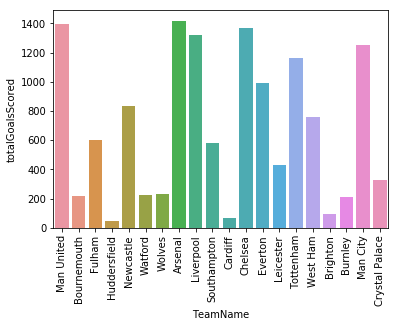

In [9]:
totalGoalsScoredPlot = sns.barplot(teamStats.TeamName, teamStats.totalGoalsScored) 
for item in totalGoalsScoredPlot.get_xticklabels():
    item.set_rotation(90)

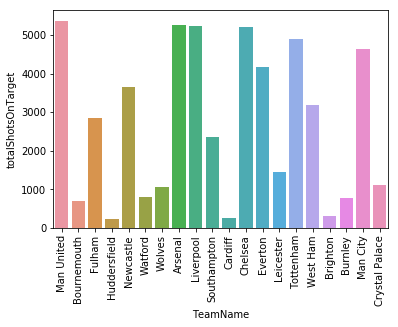

In [10]:
totalShotsOnTargetPlot = sns.barplot(teamStats.TeamName, teamStats.totalShotsOnTarget)
for item in totalShotsOnTargetPlot.get_xticklabels():
    item.set_rotation(90)

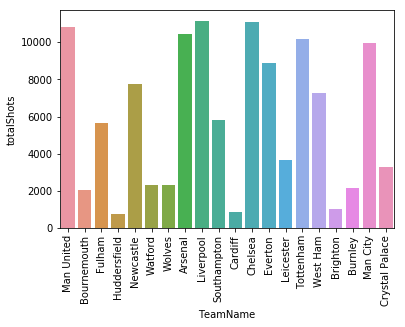

In [11]:
totalShotsPlot = sns.barplot(teamStats.TeamName, teamStats.totalShots) 
for item in totalShotsPlot.get_xticklabels():
    item.set_rotation(90)

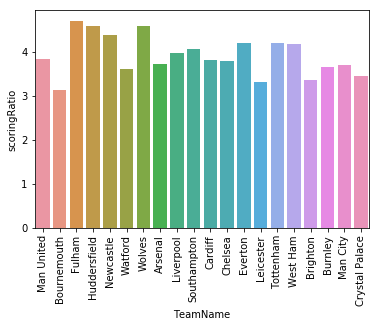

In [12]:
scoringRatioPlot = sns.barplot(teamStats.TeamName, teamStats.scoringRatio) 
for item in scoringRatioPlot.get_xticklabels():
    item.set_rotation(90)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1261a47f0>,
      dtype=object)

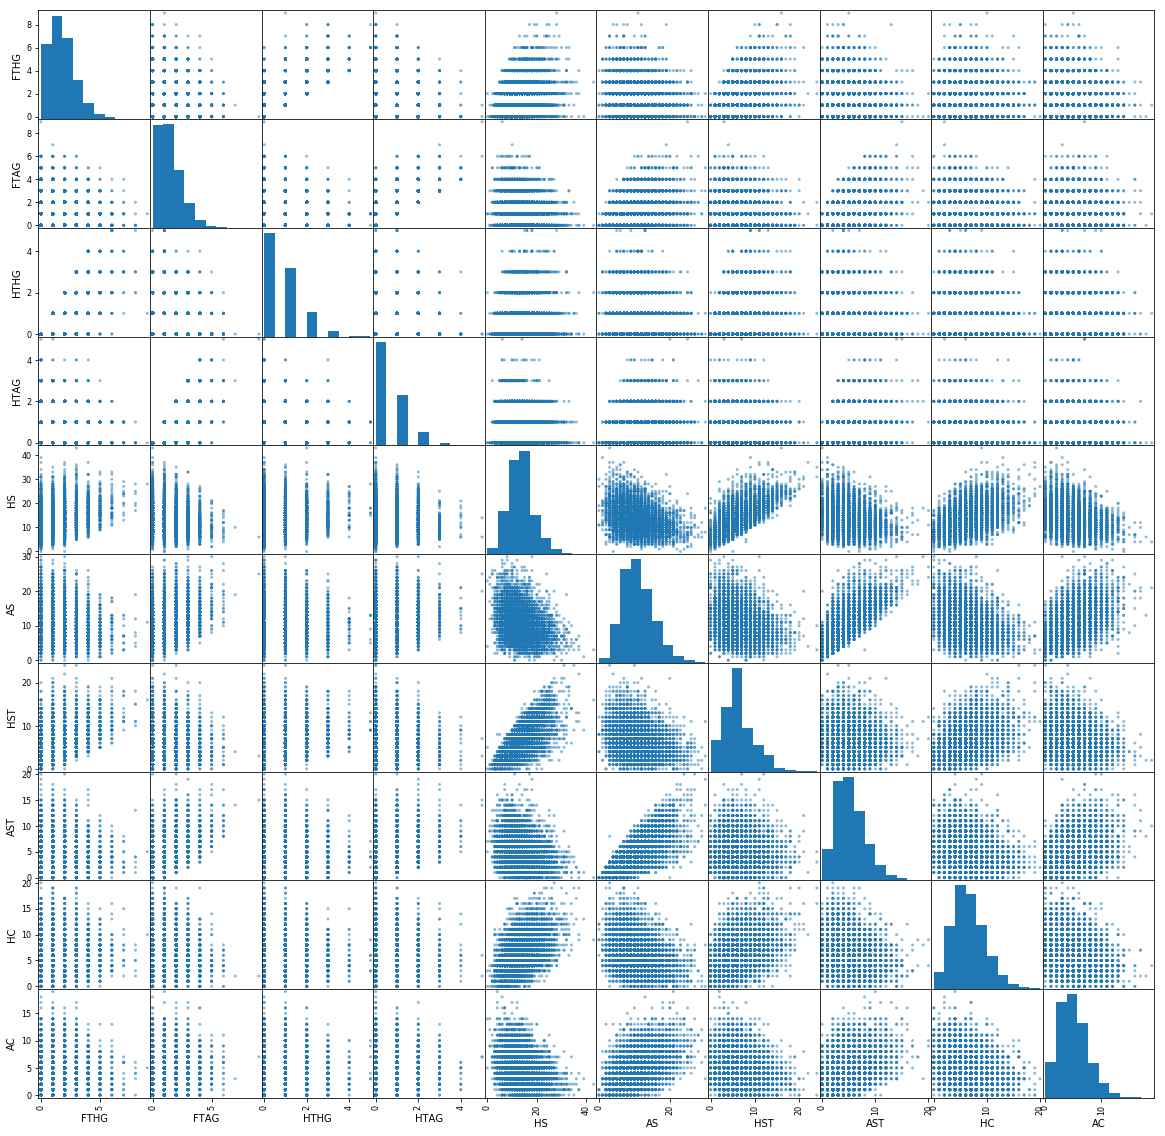

In [13]:
from pandas.plotting import scatter_matrix
scatter_matrix(data[['FTHG','FTAG','HTHG','HTAG','HS','AS','HST','AST','HC','AC']],figsize=(20,20))

In [14]:
filteredData = data[(data.HomeTeam.isin(team_name))]
data = filteredData[(filteredData.AwayTeam.isin(team_name))]

In [15]:
# Separate into feature set and target variable
#FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)
X_all = data.drop(['FTR'],1)
y_all = data['FTR']
# Z_all = X_all.drop(['Date','FTHG','FTAG','HTHG','HTAG','HTR','Referee'],1)
Z_all = X_all.drop(['Date','HTR'],1)

# print(X_all)
# print(y_all)
# print(Z_all)

# Standardising the data.
from sklearn.preprocessing import scale
#Center to the mean and component wise scale to unit variance.
# cols = [['HS','AS','HST','HF','AF','HY','AY','HR','AR','HC','AC','AST','HC','AC']]
cols = [['FTHG','FTAG','HTHG','HTAG','HS','AS','HST','HF','AF','HY','AY','HR','AR','HC','AC','AST','HC','AC']]
for col in cols:
    X_all[col] = scale(X_all[col])

In [16]:
#we want continous vars that are integers for our input data, so lets remove any categorical vars
def preprocess_features(Z):
    ''' Preprocesses the football data and converts catagorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = Z.index)

    # Investigate each feature column for the data
    for col, col_data in Z.iteritems():

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)
                    
        # Collect the revisedd columns
        output = output.join(col_data)
    
    return output

In [17]:
Z_all = preprocess_features(Z_all)
print ("Processed feature columns ({} total features):\n{}".format(len(Z_all.columns), list(Z_all.columns)))

Processed feature columns (56 total features):
['AC', 'AF', 'AR', 'AS', 'AST', 'AY', 'AwayTeam_Arsenal', 'AwayTeam_Bournemouth', 'AwayTeam_Brighton', 'AwayTeam_Burnley', 'AwayTeam_Cardiff', 'AwayTeam_Chelsea', 'AwayTeam_Crystal Palace', 'AwayTeam_Everton', 'AwayTeam_Fulham', 'AwayTeam_Huddersfield', 'AwayTeam_Leicester', 'AwayTeam_Liverpool', 'AwayTeam_Man City', 'AwayTeam_Man United', 'AwayTeam_Newcastle', 'AwayTeam_Southampton', 'AwayTeam_Tottenham', 'AwayTeam_Watford', 'AwayTeam_West Ham', 'AwayTeam_Wolves', 'FTAG', 'FTHG', 'HC', 'HF', 'HR', 'HS', 'HST', 'HTAG', 'HTHG', 'HY', 'HomeTeam_Arsenal', 'HomeTeam_Bournemouth', 'HomeTeam_Brighton', 'HomeTeam_Burnley', 'HomeTeam_Cardiff', 'HomeTeam_Chelsea', 'HomeTeam_Crystal Palace', 'HomeTeam_Everton', 'HomeTeam_Fulham', 'HomeTeam_Huddersfield', 'HomeTeam_Leicester', 'HomeTeam_Liverpool', 'HomeTeam_Man City', 'HomeTeam_Man United', 'HomeTeam_Newcastle', 'HomeTeam_Southampton', 'HomeTeam_Tottenham', 'HomeTeam_Watford', 'HomeTeam_West Ham', '

In [18]:
# Show the feature information by printing the first five rows
print ("\nFeature values:")
display(Z_all.head())


Feature values:


,AC,AF,AR,AS,AST,AY,AwayTeam_Arsenal,AwayTeam_Bournemouth,AwayTeam_Brighton,AwayTeam_Burnley,...,HomeTeam_Leicester,HomeTeam_Liverpool,HomeTeam_Man City,HomeTeam_Man United,HomeTeam_Newcastle,HomeTeam_Southampton,HomeTeam_Tottenham,HomeTeam_Watford,HomeTeam_West Ham,HomeTeam_Wolves
3,4.0,12.0,0.0,4.0,2.0,2.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,8.0,11.0,0.0,16.0,8.0,1.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,3.0,8.0,0.0,11.0,3.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,7.0,19.0,0.0,18.0,14.0,1.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,6.0,18.0,1.0,14.0,7.0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
from sklearn.model_selection import train_test_split

# Shuffle and split the dataset into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(Z_all, y_all, 
                                                    test_size = 50,
                                                    random_state = 2,
                                                    stratify = y_all)

In [20]:
#for measuring training time
from time import time 
# F1 score (also F-score or F-measure) is a measure of a test's accuracy. 
#It considers both the precision p and the recall r of the test to compute 
#the score: p is the number of correct positive results divided by the number of 
#all positive results, and r is the number of correct positive results divided by 
#the number of positive results that should have been returned. The F1 score can be 
#interpreted as a weighted average of the precision and recall, where an F1 score 
#reaches its best value at 1 and worst at 0.
from sklearn.metrics import f1_score

def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print ("Trained model in {:.4f} seconds".format(end - start))

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    
    end = time()
    # Print and return results
    print ("Made predictions in {:.4f} seconds.".format(end - start))
    
    return f1_score(target, y_pred, average='macro'), sum(target == y_pred) / float(len(y_pred))


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print ("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    f1, acc = predict_labels(clf, X_train, y_train)
    print (f1, acc)
    print ("F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1 , acc))
    
    f1, acc = predict_labels(clf, X_test, y_test)
    print ("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1 , acc))

In [21]:
# Initialize the three models (XGBoost is initialized later)
clf_A = LogisticRegression(random_state = 42)
clf_B = SVC(random_state = 912, kernel='rbf')
clf_C = KNeighborsClassifier(n_neighbors = 60)
#Boosting refers to this general problem of producing a very accurate prediction rule 
#by combining rough and moderately inaccurate rules-of-thumb
# clf_C = xgb.XGBClassifier(seed = 82)

train_predict(clf_A, X_train, y_train, X_test, y_test)
print ('')
train_predict(clf_B, X_train, y_train, X_test, y_test)
print ('')
train_predict(clf_C, X_train, y_train, X_test, y_test)
print ('')

Training a LogisticRegression using a training set size of 2800. . .
Trained model in 0.1499 seconds
Made predictions in 0.0016 seconds.
1.0 1.0
F1 score and accuracy score for training set: 1.0000 , 1.0000.
Made predictions in 0.0012 seconds.
F1 score and accuracy score for test set: 1.0000 , 1.0000.

Training a SVC using a training set size of 2800. . .


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Trained model in 0.4643 seconds
Made predictions in 0.3224 seconds.
0.8687597979242665 0.8857142857142857
F1 score and accuracy score for training set: 0.8688 , 0.8857.
Made predictions in 0.0064 seconds.
F1 score and accuracy score for test set: 0.8636 , 0.8800.

Training a KNeighborsClassifier using a training set size of 2800. . .
Trained model in 0.0074 seconds
Made predictions in 0.5402 seconds.
0.5613616398701738 0.6725
F1 score and accuracy score for training set: 0.5614 , 0.6725.
Made predictions in 0.0177 seconds.
F1 score and accuracy score for test set: 0.5755 , 0.7400.



In [22]:
model = LogisticRegression()
model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
model.predict(X_test)

array(['H', 'H', 'D', 'A', 'H', 'A', 'H', 'H', 'D', 'D', 'H', 'H', 'H',
       'H', 'H', 'H', 'H', 'A', 'D', 'H', 'H', 'H', 'H', 'H', 'H', 'A',
       'A', 'D', 'A', 'A', 'D', 'A', 'D', 'D', 'A', 'D', 'A', 'A', 'A',
       'H', 'H', 'D', 'H', 'D', 'H', 'A', 'D', 'A', 'H', 'H'],
      dtype=object)

In [24]:
predictedProbability = model.predict_proba(X_test)
predictedProbability = pd.DataFrame(predictedProbability, columns=['Away Team','Draw','Home Team'])

display((predictedProbability *100).head(10))

,Away Team,Draw,Home Team
0,4.928979e-24,2.865316e-10,1.000000e+02
1,1.920303e-11,1.519008e-03,9.999848e+01
2,2.361570e+00,9.262361e+01,5.014817e+00
3,9.752295e+01,2.476940e+00,1.115049e-04
4,3.600788e-17,7.965375e-07,1.000000e+02
5,9.999778e+01,2.218230e-03,2.215814e-11
6,4.337686e-11,1.710424e-03,9.999829e+01
7,2.659689e-05,2.331772e+00,9.766820e+01
8,3.945928e+00,9.460086e+01,1.453216e+00
9,5.580131e-01,9.696515e+01,2.476842e+00


In [25]:
fixtures = pd.read_csv('data/fixtures/epl-2018-GMT.csv')
# fixtures = fixtures[pd.isnull(fixtures['Result'])] #drop all the rows having result certain values
fixtures = fixtures.drop(['Round Number','Date','Location','Result'],1)
fixtures.columns = ['HomeTeam','AwayTeam']
fixtures['FTHG']= 0
fixtures['FTAG'] =0 
fixtures['HTHG'] = 0
fixtures['HTAG'] = 0
fixtures['HS'] = 0
fixtures['AS'] = 0
fixtures['HST'] = 0
fixtures['AST'] = 0
fixtures['HF'] = 0
fixtures['AF'] = 0
fixtures['HC'] = 0
fixtures['AC'] = 0
fixtures['HY'] = 0
fixtures['AY'] = 0
fixtures['HR'] = 0
fixtures['AR'] = 0

In [26]:
display(fixtures.head(10))

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,Man Utd,Leicester,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Newcastle,Spurs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Bournemouth,Cardiff,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fulham,Crystal Palace,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Huddersfield,Chelsea,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Watford,Brighton,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Wolves,Everton,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Liverpool,West Ham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Southampton,Burnley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Arsenal,Man City,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
preprocessedFixtures = preprocess_features(fixtures)

In [28]:
print ("Processed feature columns ({} total features):\n{}".format(len(preprocessedFixtures.columns),
                                                                   list(preprocessedFixtures.columns)))

Processed feature columns (56 total features):
['HomeTeam_Arsenal', 'HomeTeam_Bournemouth', 'HomeTeam_Brighton', 'HomeTeam_Burnley', 'HomeTeam_Cardiff', 'HomeTeam_Chelsea', 'HomeTeam_Crystal Palace', 'HomeTeam_Everton', 'HomeTeam_Fulham', 'HomeTeam_Huddersfield', 'HomeTeam_Leicester', 'HomeTeam_Liverpool', 'HomeTeam_Man City', 'HomeTeam_Man Utd', 'HomeTeam_Newcastle', 'HomeTeam_Southampton', 'HomeTeam_Spurs', 'HomeTeam_Watford', 'HomeTeam_West Ham', 'HomeTeam_Wolves', 'AwayTeam_Arsenal', 'AwayTeam_Bournemouth', 'AwayTeam_Brighton', 'AwayTeam_Burnley', 'AwayTeam_Cardiff', 'AwayTeam_Chelsea', 'AwayTeam_Crystal Palace', 'AwayTeam_Everton', 'AwayTeam_Fulham', 'AwayTeam_Huddersfield', 'AwayTeam_Leicester', 'AwayTeam_Liverpool', 'AwayTeam_Man City', 'AwayTeam_Man Utd', 'AwayTeam_Newcastle', 'AwayTeam_Southampton', 'AwayTeam_Spurs', 'AwayTeam_Watford', 'AwayTeam_West Ham', 'AwayTeam_Wolves', 'FTHG', 'FTAG', 'HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'A

In [29]:
model.predict(preprocessedFixtures)

array(['D', 'D', 'D', 'A', 'D', 'D', 'H', 'D', 'D', 'D', 'D', 'D', 'D',
       'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'H', 'D', 'D', 'D',
       'A', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D',
       'D', 'D', 'D', 'D', 'A', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D',
       'D', 'D', 'D', 'D', 'D', 'D', 'D', 'H', 'D', 'D', 'D', 'D', 'D',
       'D', 'D', 'D', 'D', 'A', 'D', 'D', 'D', 'H', 'D', 'D', 'D', 'D',
       'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'A', 'D', 'D',
       'D', 'D', 'D', 'D', 'D', 'D', 'D', 'H', 'D', 'D', 'D', 'D', 'D',
       'D', 'D', 'D', 'D', 'A', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D',
       'H', 'D', 'D', 'D', 'D', 'D', 'A', 'D', 'D', 'D', 'D', 'D', 'D',
       'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'H', 'D', 'A', 'D',
       'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'A',
       'D', 'D', 'D', 'D', 'H', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D',
       'D', 'D', 'D', 'D', 'D', 'D', 'A', 'D', 'D', 'D', 'D', 'D

In [30]:
fixtures['Result Predicted'] = model.predict(preprocessedFixtures)

In [31]:
Result = fixtures.drop(['FTHG','FTAG','HTHG','HTAG','HS','AS','HST','HF','AF','HY',
                        'AY','HR','AR','HC','AC','AST','HC','AC'],1)
Result.head(10)

,HomeTeam,AwayTeam,Result Predicted
0,Man Utd,Leicester,D
1,Newcastle,Spurs,D
2,Bournemouth,Cardiff,D
3,Fulham,Crystal Palace,A
4,Huddersfield,Chelsea,D
5,Watford,Brighton,D
6,Wolves,Everton,H
7,Liverpool,West Ham,D
8,Southampton,Burnley,D
9,Arsenal,Man City,D


In [32]:
fixturePredictedProbability = model.predict_proba(preprocessedFixtures) *100
fixturePredictedProbability = pd.DataFrame(fixturePredictedProbability, columns=['Away win %','Draw %','Home win %'])

display(fixturePredictedProbability)

,Away win %,Draw %,Home win %
0,20.498172,60.999406,18.502423
1,11.238956,66.021122,22.739922
2,21.358408,58.563070,20.078522
3,99.649191,0.350706,0.000103
4,15.863579,67.335213,16.801209
...,...,...,...
375,29.208442,49.616772,21.174785
376,16.908090,60.561670,22.530240
377,16.960878,62.258114,20.781008
378,0.000076,0.158032,99.841892


In [33]:
final = pd.concat([Result, fixturePredictedProbability], axis = 1)

In [34]:
final.head(20)

,HomeTeam,AwayTeam,Result Predicted,Away win %,Draw %,Home win %
0,Man Utd,Leicester,D,20.498172,60.999406,18.502423
1,Newcastle,Spurs,D,11.238956,66.021122,22.739922
2,Bournemouth,Cardiff,D,21.358408,58.563070,20.078522
3,Fulham,Crystal Palace,A,99.649191,0.350706,0.000103
4,Huddersfield,Chelsea,D,15.863579,67.335213,16.801209
5,Watford,Brighton,D,22.046347,55.830140,22.123513
6,Wolves,Everton,H,0.000106,0.206127,99.793767
7,Liverpool,West Ham,D,19.445793,63.322629,17.231578
8,Southampton,Burnley,D,16.879745,59.123822,23.996433
9,Arsenal,Man City,D,18.363110,57.026333,24.610556


In [36]:
final.to_csv('data/final-Predicted-Result.csv', index = None) #index=None for no indexing

In [38]:
readFixtures = pd.read_csv('data/fixtures/epl-2018-GMT.csv')
exportToFixtures = final.drop(['HomeTeam','AwayTeam'],1)

PredictedResultWithFixtureData = pd.concat([readFixtures,exportToFixtures], axis = 1)
PredictedResultWithFixtureData.to_csv('data/Predicted_Result_With_Fixture_Data.csv')


display(PredictedResultWithFixtureData.head(20))

,Round Number,Date,Location,Home Team,Away Team,Result,Result Predicted,Away win %,Draw %,Home win %
0,1,10/08/2018 20:00,Old Trafford,Man Utd,Leicester,2 - 1,D,20.498172,60.999406,18.502423
1,1,11/08/2018 12:30,St. James' Park,Newcastle,Spurs,1 - 2,D,11.238956,66.021122,22.739922
2,1,11/08/2018 15:00,Vitality Stadium,Bournemouth,Cardiff,2 - 0,D,21.358408,58.563070,20.078522
3,1,11/08/2018 15:00,Craven Cottage,Fulham,Crystal Palace,0 - 2,A,99.649191,0.350706,0.000103
4,1,11/08/2018 15:00,John Smith's Stadium,Huddersfield,Chelsea,0 - 3,D,15.863579,67.335213,16.801209
5,1,11/08/2018 15:00,Vicarage Road,Watford,Brighton,2 - 0,D,22.046347,55.830140,22.123513
6,1,11/08/2018 17:30,Molineux Stadium,Wolves,Everton,2 - 2,H,0.000106,0.206127,99.793767
7,1,12/08/2018 13:30,Anfield,Liverpool,West Ham,4 - 0,D,19.445793,63.322629,17.231578
8,1,12/08/2018 13:30,St. Mary's Stadium,Southampton,Burnley,0 - 0,D,16.879745,59.123822,23.996433
9,1,12/08/2018 16:00,Emirates Stadium,Arsenal,Man City,0 - 2,D,18.363110,57.026333,24.610556
